# Project using different ML models. We have to predict if a customer end a partnership with our provider

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


Check for any missing values

In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Is our data balanced?

<AxesSubplot:xlabel='Churn', ylabel='count'>

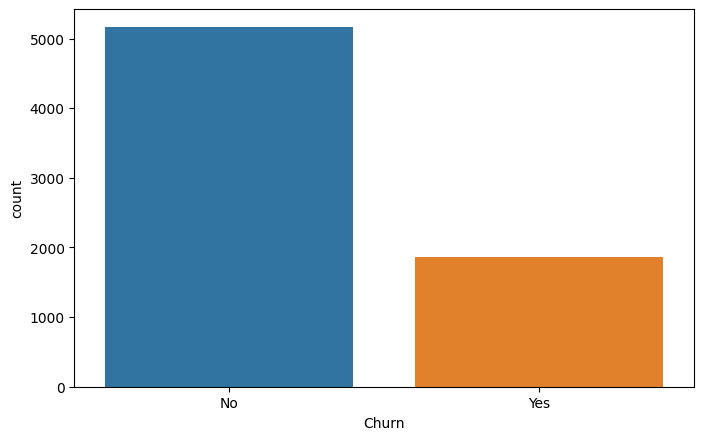

In [7]:
plt.figure(figsize=(8,5),dpi=100)
sns.countplot(data=df, x='Churn')

How important is a price

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

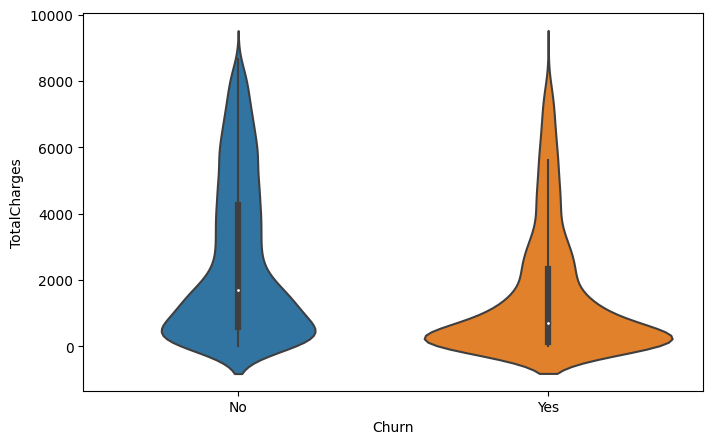

In [8]:
plt.figure(figsize=(8,5),dpi=100)
sns.violinplot(data=df, x='Churn', y='TotalCharges')

It's seams that TotalCharges don't affect that much on decision, but we have to consider different lenght of an offer

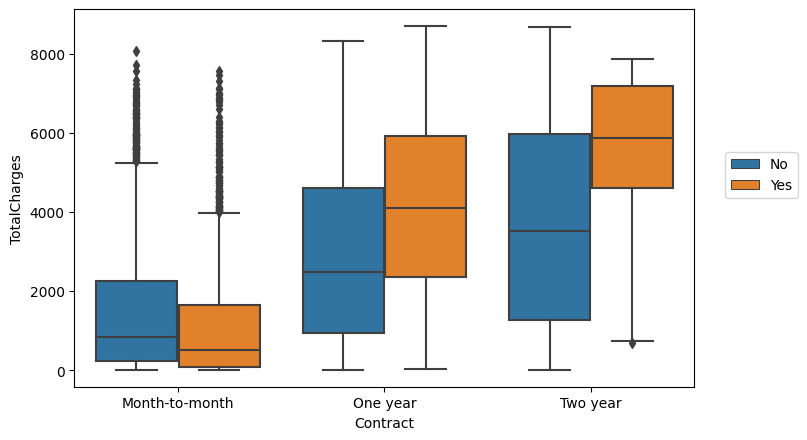

In [109]:
plt.figure(figsize=(8,5),dpi=100)
sns.boxplot(data=df, x='Contract', y='TotalCharges',hue='Churn')
plt.legend(loc=[1.05,0.5])

It seams that clients with more charges tend to churn after long contract

Check correlation of some features to our label column

In [10]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
corr_df  = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','Churn']]).corr()

In [12]:
corr_df['Churn_Yes'].sort_values().iloc[1:-1]

Contract_Two year                         -0.301552
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
TechSupport_No internet service           -0.227578
DeviceProtection_No internet service      -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
InternetService_No                        -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup_Yes                          -0.082307
DeviceProtec

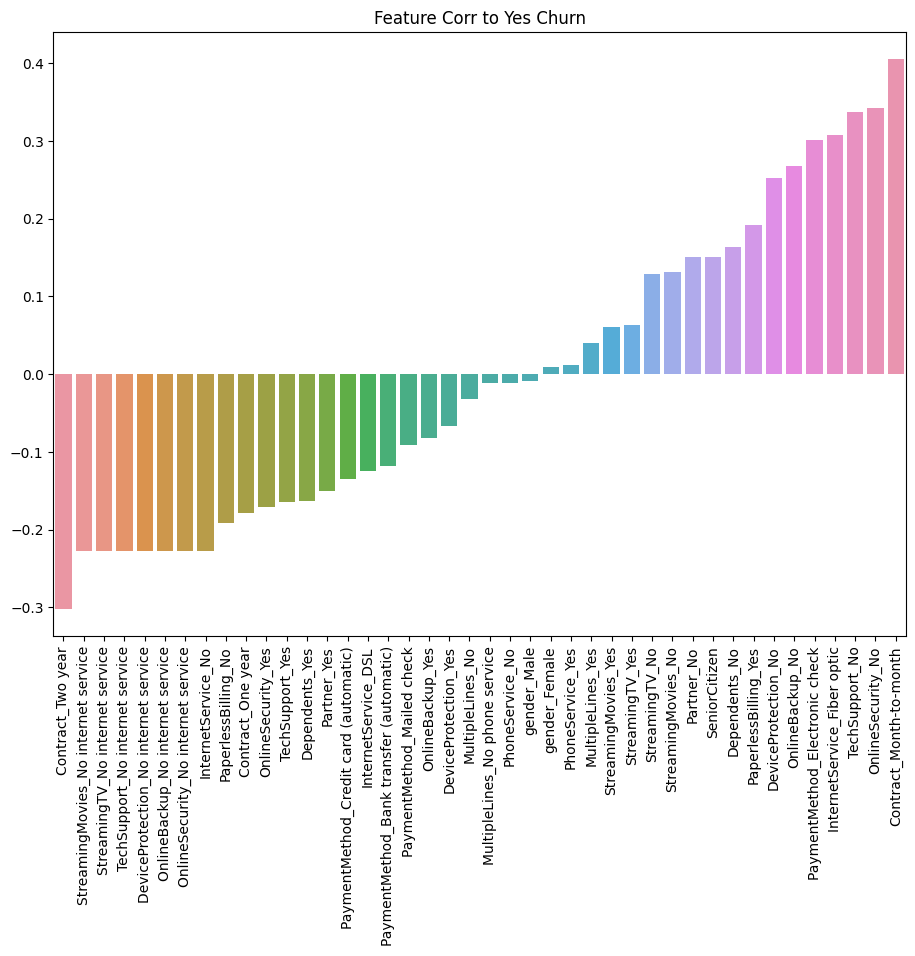

In [13]:
plt.figure(figsize=(11,8),dpi=100)
sns.barplot(x=corr_df['Churn_Yes'].sort_values().iloc[1:-1].index,
            y=corr_df['Churn_Yes'].sort_values().iloc[1:-1].values)
plt.title('Feature Corr to Yes Churn')
plt.xticks(rotation=90);

Let's explore imprtance of partnership length

In [14]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

Tenure is amount of months a customer was a customer

<AxesSubplot:xlabel='tenure', ylabel='Count'>

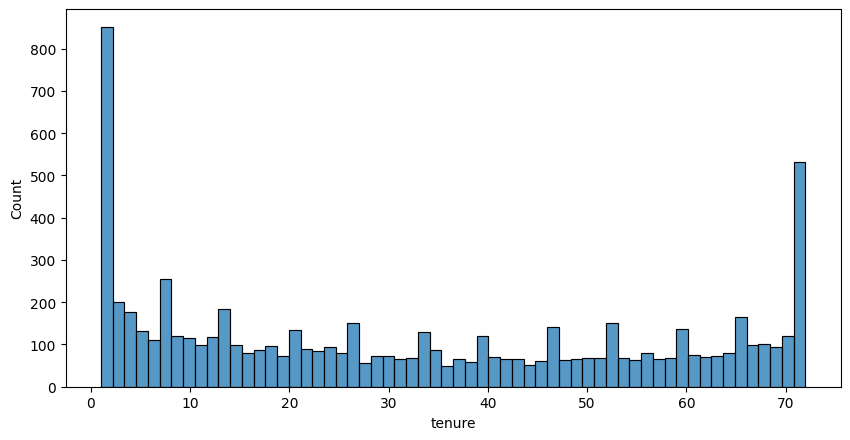

In [15]:
plt.figure(figsize=(10,5),dpi=100)
sns.histplot(data=df,x='tenure',bins=60)

<Figure size 2000x1000 with 0 Axes>

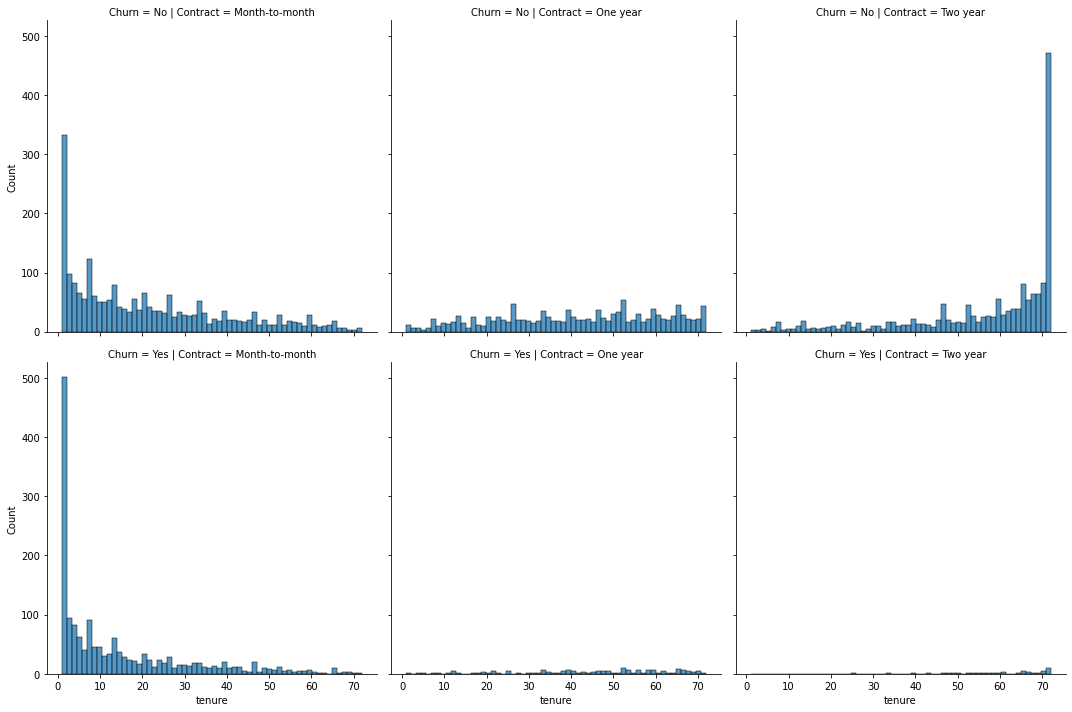

In [16]:
plt.figure(figsize=(10,5),dpi=200)
sns.displot(data=df,x='tenure',bins=60,row='Churn',col='Contract');

We can see that most of the customers who leave, do that shortly after starting a partnership

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

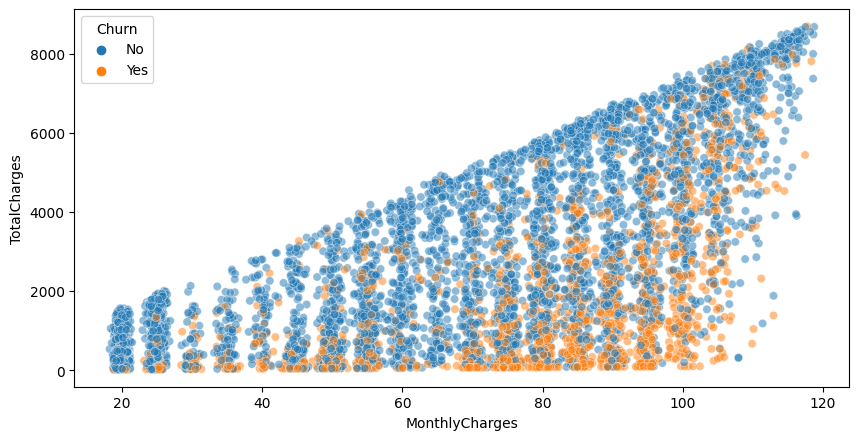

In [110]:
plt.figure(figsize=(10,5),dpi=100)
sns.scatterplot(data=df, x='MonthlyCharges',y='TotalCharges',hue='Churn',alpha=0.5)

We can see that customers with high MonthlyCharges tend to churn

Let's see how high is a Churn rate based on tenure

In [18]:
df['tenure'].max()

72

In [19]:
indexes = np.arange(1,73)
rates = []
for i in range(1,73):
    rates.append(len(df[(df['Churn']=='Yes') & (df['tenure']==i)]) / len(df[df['tenure']==i])*100)

In [20]:
tenur_rate = pd.Series(data=rates,index=indexes)

Text(0, 0.5, 'Churn percentage')

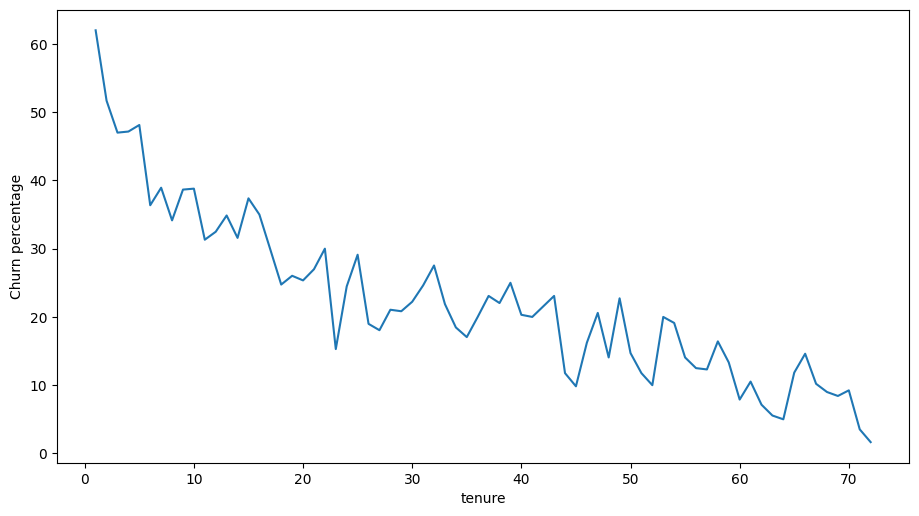

In [21]:
plt.figure(figsize=(11,6),dpi=100)
plt.plot(tenur_rate.index, tenur_rate.values)
plt.xlabel('tenure')
plt.ylabel('Churn percentage')

We will add tenure classification to our df

In [22]:
def tenur_class(num):
    if num < 13:
        return '0-12 Months'
    elif num < 24:
        return '12-24 Months'
    elif num < 48:
        return '24-48 Months'
    else:
        return 'Over 48 Months'

In [23]:
df['Tenure_class'] = df['tenure'].apply(tenur_class)

In [24]:
df[['Tenure_class','tenure']]

,Tenure_class,tenure
0,0-12 Months,1
1,24-48 Months,34
2,0-12 Months,2
3,24-48 Months,45
4,0-12 Months,2
...,...,...
7027,24-48 Months,24
7028,Over 48 Months,72
7029,0-12 Months,11
7030,0-12 Months,4


<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

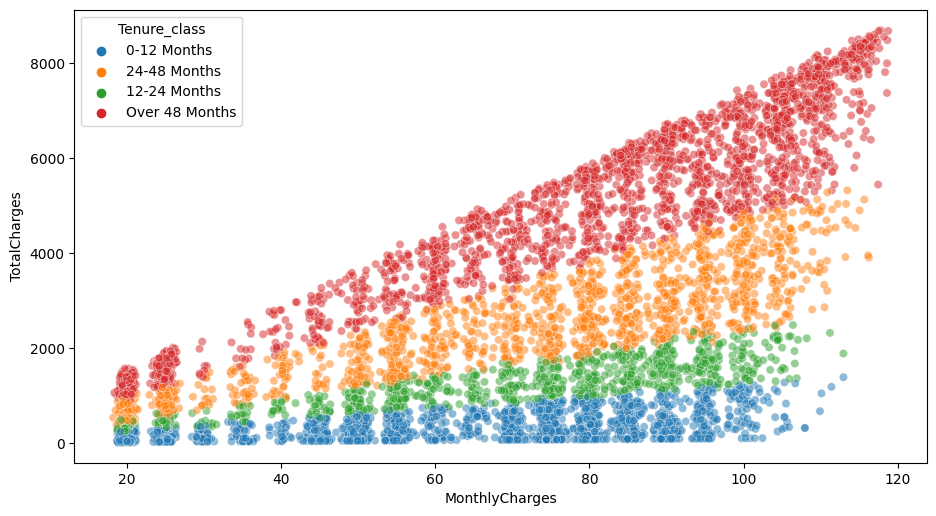

In [25]:
plt.figure(figsize=(11,6),dpi=100)
sns.scatterplot(data=df, x='MonthlyCharges',y='TotalCharges',hue='Tenure_class',alpha=0.5)

<AxesSubplot:xlabel='Tenure_class', ylabel='count'>

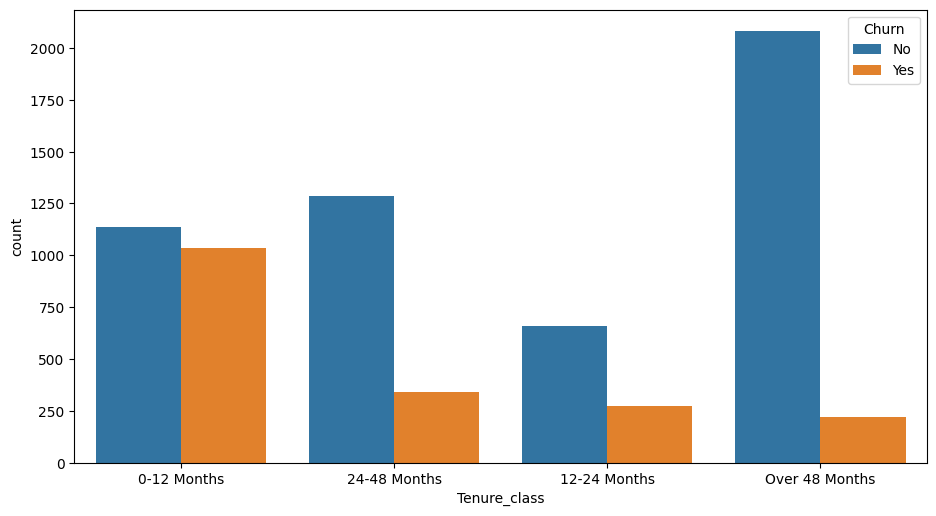

In [26]:
plt.figure(figsize=(11,6),dpi=100)
sns.countplot(data=df, x='Tenure_class',hue='Churn')

<Figure size 2200x1200 with 0 Axes>

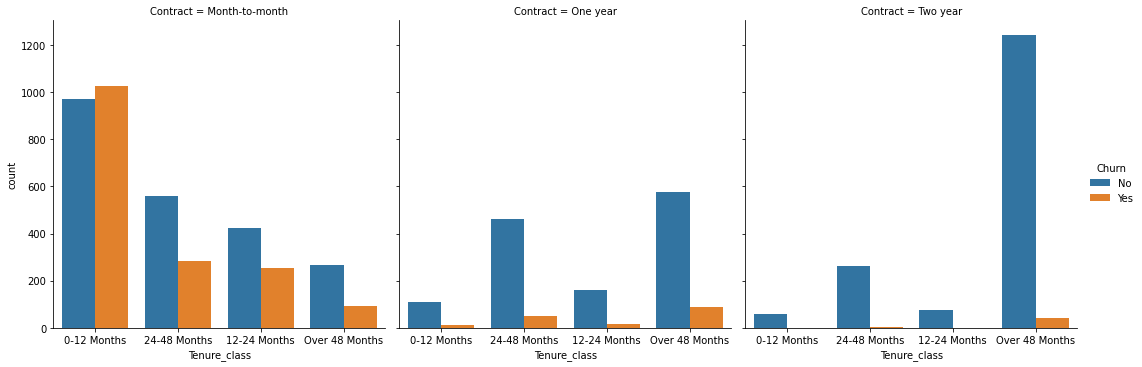

In [27]:
plt.figure(figsize=(11,6),dpi=200)
sns.catplot(data=df, x='Tenure_class',hue='Churn',col='Contract',kind='count');

Most of the customers leave when they have Month to month type contract. It tends to happen in first year of the contract.

# ML model

In [28]:
X = df.drop(['Churn','customerID'],axis=1)
y = df['Churn']

In [29]:
X = pd.get_dummies(X,drop_first=True)

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [35]:
scaler = StandardScaler()

In [36]:
X_train = scaler.fit_transform(X_train)

In [37]:
X_test = scaler.transform(X_test)

#### Single Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
model = DecisionTreeClassifier(max_depth=6)

In [56]:
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [57]:
y_pred = model.predict(X_test)

In [58]:
accuracy_score(y_test,y_pred)

0.8096590909090909

In [59]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.87      0.89      0.88       557
         Yes       0.55      0.49      0.52       147

    accuracy                           0.81       704
   macro avg       0.71      0.69      0.70       704
weighted avg       0.80      0.81      0.81       704



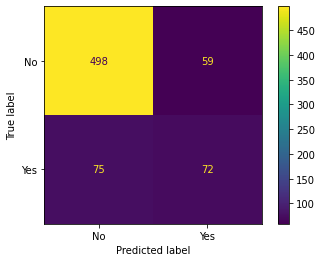

In [60]:
plot_confusion_matrix(model,X_test,y_test)

In [61]:
from sklearn.tree import plot_tree

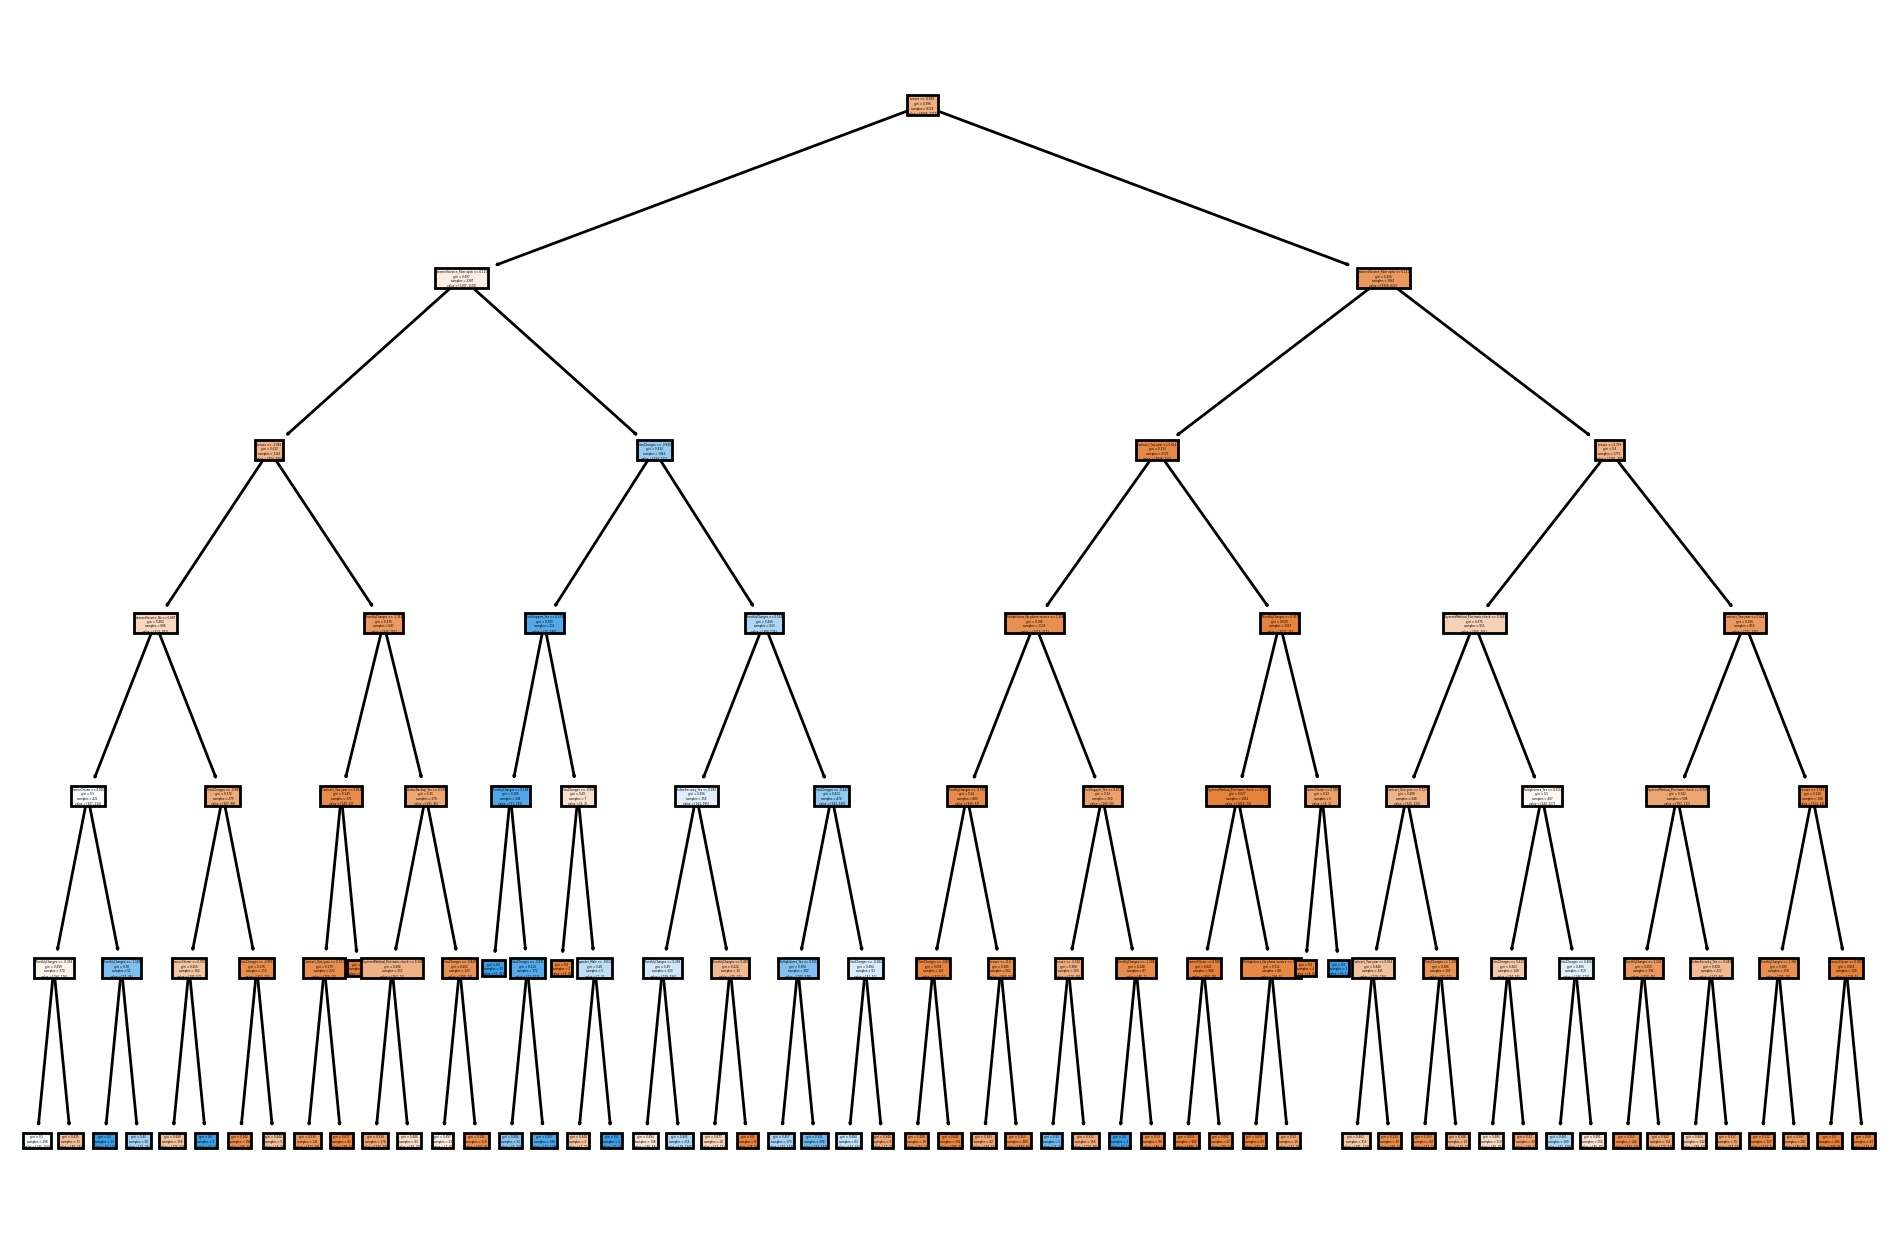

In [62]:
plt.figure(figsize=(12,8),dpi=200)
plot_tree(model,feature_names=X.columns,filled=True);

Let's plot feature importance for single decision tree

In [81]:
feature_impt = pd.DataFrame(data=model.feature_importances_, index=X.columns, columns=['Feature importance']).sort_values('Feature importance')

In [82]:
feature_impt = feature_impt[feature_impt['Feature importance']>0]

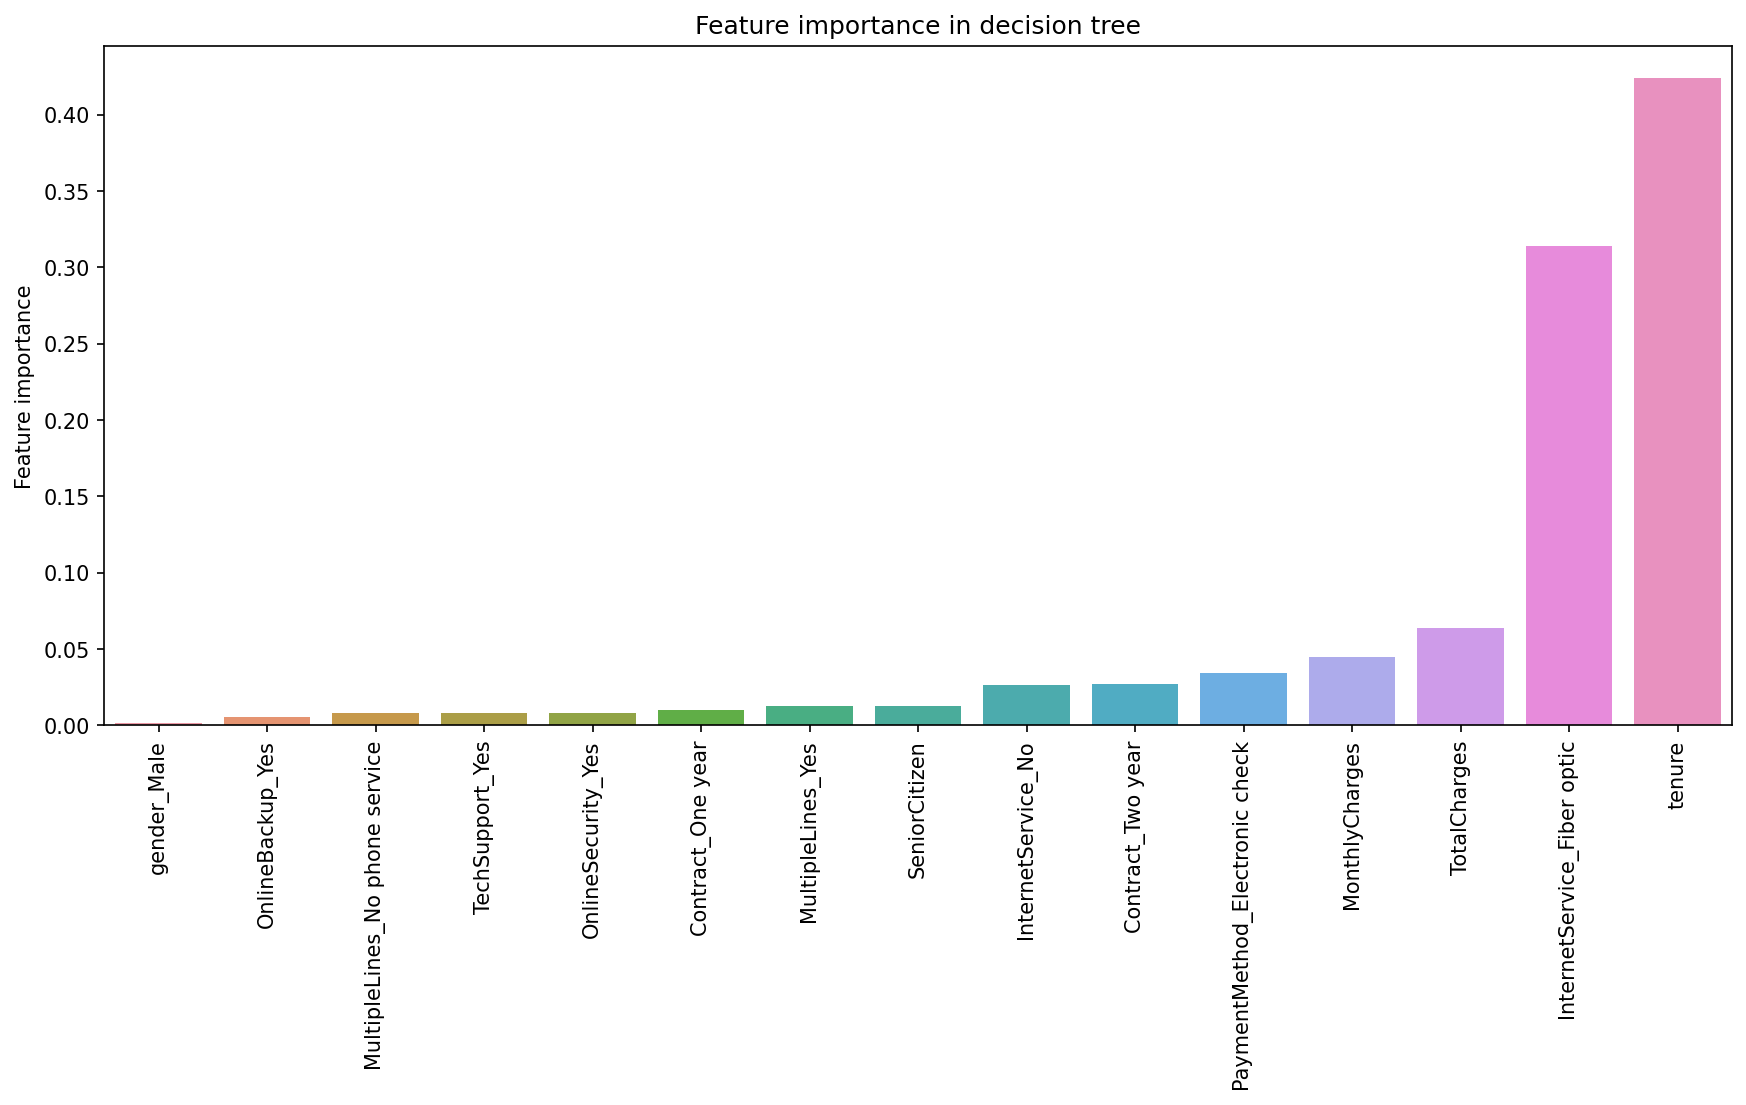

In [84]:
plt.figure(figsize=(14,6),dpi=150)
sns.barplot(data=feature_impt,x=feature_impt.index,y=feature_impt['Feature importance'])
plt.xticks(rotation=90)
plt.title('Feature importance in decision tree');

#### Random Forest

In [111]:
from sklearn.ensemble import RandomForestClassifier

In [112]:
model = RandomForestClassifier(n_estimators=100, oob_score=True,max_depth=6)

In [113]:
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=6, oob_score=True)

In [114]:
y_pred = model.predict(X_test)

In [115]:
accuracy_score(y_test,y_pred)

0.8224431818181818

In [116]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.86      0.93      0.89       557
         Yes       0.61      0.43      0.50       147

    accuracy                           0.82       704
   macro avg       0.73      0.68      0.70       704
weighted avg       0.81      0.82      0.81       704



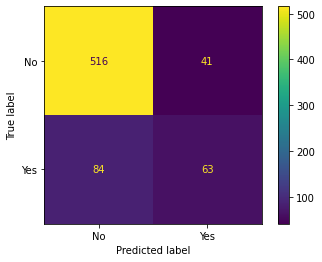

In [117]:
plot_confusion_matrix(model,X_test,y_test)

#### AdaBoost

In [93]:
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier

In [94]:
model = AdaBoostClassifier()

In [95]:
model.fit(X_train, y_train)

AdaBoostClassifier()

In [96]:
y_pred = model.predict(X_test)

In [97]:
accuracy_score(y_test,y_pred)

0.8295454545454546

In [98]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.88      0.90      0.89       557
         Yes       0.60      0.54      0.57       147

    accuracy                           0.83       704
   macro avg       0.74      0.72      0.73       704
weighted avg       0.82      0.83      0.83       704



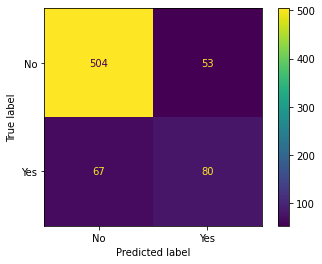

In [99]:
plot_confusion_matrix(model,X_test,y_test)

#### Gradient Boost

In [100]:
model = GradientBoostingClassifier()

In [101]:
param_grid = {'n_estimators':[50,100],
             'learning_rate':[0.1,0.05,0.2],
             'max_depth':[3,4,5]}

In [102]:
grid_model = GridSearchCV(model,param_grid)

In [103]:
grid_model.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100]})

In [104]:
grid_model.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [105]:
y_pred = grid_model.predict(X_test)

In [106]:
accuracy_score(y_test,y_pred)

0.8167613636363636

In [107]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.87      0.90      0.89       557
         Yes       0.57      0.50      0.53       147

    accuracy                           0.82       704
   macro avg       0.72      0.70      0.71       704
weighted avg       0.81      0.82      0.81       704



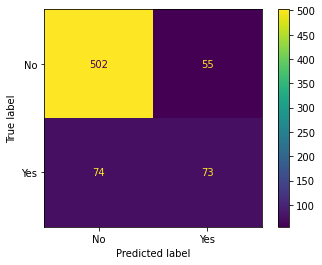

In [108]:
plot_confusion_matrix(grid_model,X_test,y_test)